## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0  0.936001  0.930153  1.599328 -0.948921  0.670234  1.020664
1 -1.613959  0.406967 -0.938824 -1.283500  0.112955 -1.629429
2 -1.374979  1.116157 -0.541842 -1.134992  0.002438 -1.406027
3 -0.966601 -1.654407  0.428595 -0.998796 -0.108520 -1.824889
4  0.288442 -1.156207  0.826400 -0.475633  1.468607 -0.247952


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9805019	total: 54.6ms	remaining: 54.5s
1:	learn: 0.9708592	total: 55.1ms	remaining: 27.5s
2:	learn: 0.9607284	total: 55.5ms	remaining: 18.5s
3:	learn: 0.9516759	total: 56.3ms	remaining: 14s
4:	learn: 0.9436184	total: 56.8ms	remaining: 11.3s
5:	learn: 0.9337199	total: 57ms	remaining: 9.44s
6:	learn: 0.9266124	total: 57.5ms	remaining: 8.15s
7:	learn: 0.9186145	total: 57.9ms	remaining: 7.18s
8:	learn: 0.9086981	total: 58.4ms	remaining: 6.43s
9:	learn: 0.9013915	total: 59.1ms	remaining: 5.85s
10:	learn: 0.8928411	total: 59.7ms	remaining: 5.36s
11:	learn: 0.8831615	total: 60.2ms	remaining: 4.95s
12:	learn: 0.8739385	total: 60.7ms	remaining: 4.61s
13:	learn: 0.8670505	total: 61.3ms	remaining: 4.31s
14:	learn: 0.8590780	total: 61.7ms	remaining: 4.05s
15:	learn: 0.8498090	total: 62.2ms	remaining: 3.83s
16:	learn: 0.8413850	total: 62.6ms	remaining: 3.62s
17:	learn: 0.8327226	total: 63.1ms	remaining: 3.44s
18:	learn: 0.8239413	total: 63.7ms	remaining: 3.

100:	learn: 0.4177331	total: 105ms	remaining: 933ms
101:	learn: 0.4146738	total: 105ms	remaining: 928ms
102:	learn: 0.4111602	total: 106ms	remaining: 922ms
103:	learn: 0.4080763	total: 106ms	remaining: 916ms
104:	learn: 0.4053197	total: 107ms	remaining: 911ms
105:	learn: 0.4021953	total: 107ms	remaining: 906ms
106:	learn: 0.3992226	total: 108ms	remaining: 900ms
107:	learn: 0.3961713	total: 108ms	remaining: 895ms
108:	learn: 0.3929204	total: 109ms	remaining: 891ms
109:	learn: 0.3894120	total: 110ms	remaining: 887ms
110:	learn: 0.3868542	total: 110ms	remaining: 882ms
111:	learn: 0.3845507	total: 111ms	remaining: 877ms
112:	learn: 0.3824593	total: 111ms	remaining: 873ms
113:	learn: 0.3799088	total: 112ms	remaining: 869ms
114:	learn: 0.3768384	total: 112ms	remaining: 863ms
115:	learn: 0.3734540	total: 113ms	remaining: 858ms
116:	learn: 0.3705016	total: 113ms	remaining: 853ms
117:	learn: 0.3677110	total: 114ms	remaining: 849ms
118:	learn: 0.3653912	total: 114ms	remaining: 844ms
119:	learn: 

264:	learn: 0.1446270	total: 187ms	remaining: 518ms
265:	learn: 0.1435451	total: 187ms	remaining: 517ms
266:	learn: 0.1430255	total: 188ms	remaining: 516ms
267:	learn: 0.1422856	total: 188ms	remaining: 514ms
268:	learn: 0.1416837	total: 189ms	remaining: 513ms
269:	learn: 0.1412463	total: 189ms	remaining: 512ms
270:	learn: 0.1402920	total: 190ms	remaining: 510ms
271:	learn: 0.1398156	total: 190ms	remaining: 509ms
272:	learn: 0.1392290	total: 191ms	remaining: 507ms
273:	learn: 0.1380968	total: 191ms	remaining: 506ms
274:	learn: 0.1376570	total: 192ms	remaining: 505ms
275:	learn: 0.1365178	total: 192ms	remaining: 504ms
276:	learn: 0.1360821	total: 193ms	remaining: 503ms
277:	learn: 0.1357538	total: 193ms	remaining: 501ms
278:	learn: 0.1346951	total: 193ms	remaining: 500ms
279:	learn: 0.1342433	total: 194ms	remaining: 499ms
280:	learn: 0.1333092	total: 194ms	remaining: 498ms
281:	learn: 0.1326972	total: 195ms	remaining: 497ms
282:	learn: 0.1318648	total: 195ms	remaining: 495ms
283:	learn: 

469:	learn: 0.0561388	total: 289ms	remaining: 325ms
470:	learn: 0.0560813	total: 289ms	remaining: 325ms
471:	learn: 0.0558185	total: 290ms	remaining: 324ms
472:	learn: 0.0554744	total: 290ms	remaining: 323ms
473:	learn: 0.0551381	total: 291ms	remaining: 322ms
474:	learn: 0.0548092	total: 291ms	remaining: 322ms
475:	learn: 0.0545708	total: 292ms	remaining: 321ms
476:	learn: 0.0543363	total: 292ms	remaining: 320ms
477:	learn: 0.0541057	total: 292ms	remaining: 319ms
478:	learn: 0.0538788	total: 293ms	remaining: 319ms
479:	learn: 0.0535326	total: 293ms	remaining: 318ms
480:	learn: 0.0531966	total: 294ms	remaining: 317ms
481:	learn: 0.0529768	total: 295ms	remaining: 317ms
482:	learn: 0.0529153	total: 295ms	remaining: 316ms
483:	learn: 0.0525901	total: 296ms	remaining: 315ms
484:	learn: 0.0523827	total: 296ms	remaining: 315ms
485:	learn: 0.0520818	total: 297ms	remaining: 314ms
486:	learn: 0.0517841	total: 297ms	remaining: 313ms
487:	learn: 0.0514940	total: 298ms	remaining: 313ms
488:	learn: 

640:	learn: 0.0277003	total: 371ms	remaining: 208ms
641:	learn: 0.0275742	total: 371ms	remaining: 207ms
642:	learn: 0.0274506	total: 372ms	remaining: 206ms
643:	learn: 0.0273292	total: 372ms	remaining: 206ms
644:	learn: 0.0272058	total: 373ms	remaining: 205ms
645:	learn: 0.0271409	total: 373ms	remaining: 204ms
646:	learn: 0.0270774	total: 374ms	remaining: 204ms
647:	learn: 0.0269583	total: 374ms	remaining: 203ms
648:	learn: 0.0268965	total: 374ms	remaining: 202ms
649:	learn: 0.0268180	total: 375ms	remaining: 202ms
650:	learn: 0.0267417	total: 375ms	remaining: 201ms
651:	learn: 0.0266675	total: 376ms	remaining: 201ms
652:	learn: 0.0266014	total: 376ms	remaining: 200ms
653:	learn: 0.0265255	total: 377ms	remaining: 199ms
654:	learn: 0.0264863	total: 377ms	remaining: 199ms
655:	learn: 0.0263376	total: 378ms	remaining: 198ms
656:	learn: 0.0262647	total: 378ms	remaining: 197ms
657:	learn: 0.0262267	total: 379ms	remaining: 197ms
658:	learn: 0.0261565	total: 379ms	remaining: 196ms
659:	learn: 

845:	learn: 0.0119543	total: 472ms	remaining: 86ms
846:	learn: 0.0119414	total: 473ms	remaining: 85.4ms
847:	learn: 0.0119128	total: 473ms	remaining: 84.9ms
848:	learn: 0.0118390	total: 474ms	remaining: 84.3ms
849:	learn: 0.0118237	total: 474ms	remaining: 83.7ms
850:	learn: 0.0118112	total: 475ms	remaining: 83.1ms
851:	learn: 0.0117988	total: 475ms	remaining: 82.6ms
852:	learn: 0.0117435	total: 476ms	remaining: 82ms
853:	learn: 0.0116716	total: 476ms	remaining: 81.4ms
854:	learn: 0.0116596	total: 477ms	remaining: 80.9ms
855:	learn: 0.0116460	total: 477ms	remaining: 80.3ms
856:	learn: 0.0116326	total: 478ms	remaining: 79.7ms
857:	learn: 0.0115786	total: 478ms	remaining: 79.2ms
858:	learn: 0.0115576	total: 479ms	remaining: 78.6ms
859:	learn: 0.0115310	total: 479ms	remaining: 78.1ms
860:	learn: 0.0114966	total: 480ms	remaining: 77.5ms
861:	learn: 0.0114626	total: 481ms	remaining: 76.9ms
862:	learn: 0.0114367	total: 481ms	remaining: 76.4ms
863:	learn: 0.0113913	total: 482ms	remaining: 75.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

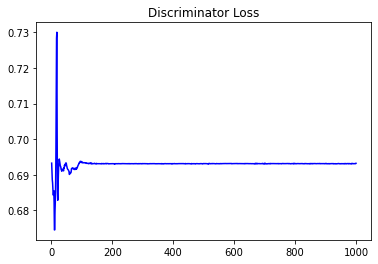

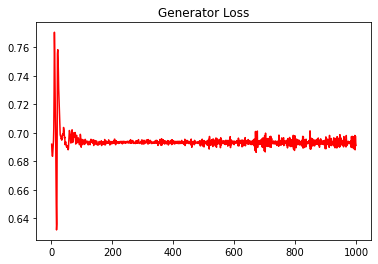

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08257648009262983


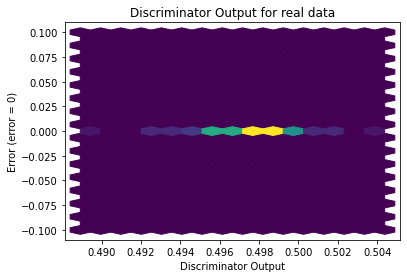

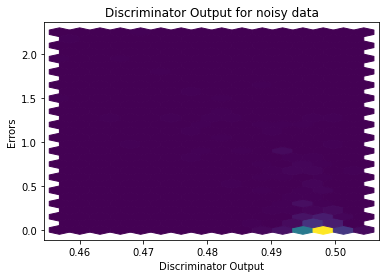

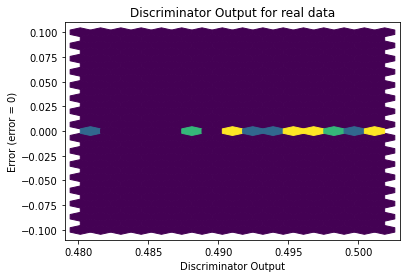

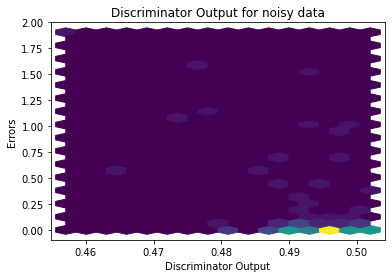

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


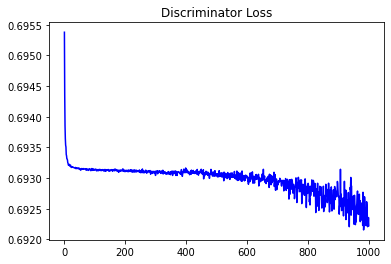

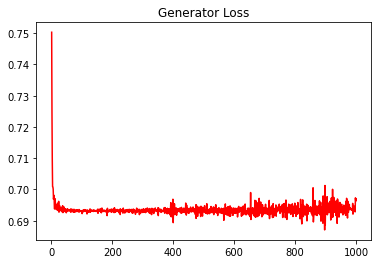

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11212710831375501


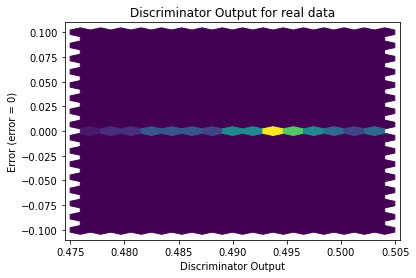

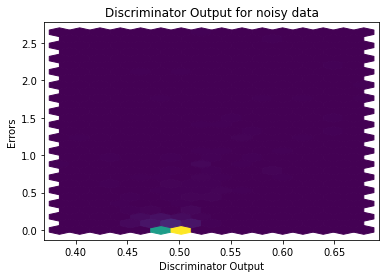

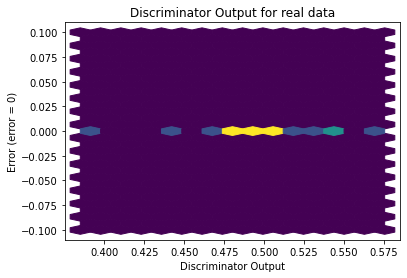

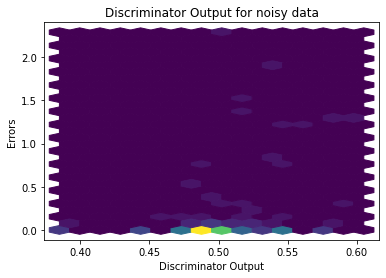

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
